#***RNN***

#8:1:1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/BNB.csv')

In [ ]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 8:1:1
train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.1)
val_size = len(scaled_prices) - train_size - test_size

train, test, val = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size], scaled_prices[train_size+test_size:]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_val, y_val = create_dataset(val, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
1462/1462 - 13s - loss: 0.0015 - val_loss: 0.0018 - 13s/epoch - 9ms/step
Epoch 2/50
1462/1462 - 12s - loss: 8.3801e-04 - val_loss: 9.6989e-04 - 12s/epoch - 8ms/step
Epoch 3/50
1462/1462 - 11s - loss: 6.7436e-04 - val_loss: 6.9044e-04 - 11s/epoch - 7ms/step
Epoch 4/50
1462/1462 - 11s - loss: 6.3987e-04 - val_loss: 0.0011 - 11s/epoch - 8ms/step
Epoch 5/50
1462/1462 - 12s - loss: 6.7608e-04 - val_loss: 7.5544e-04 - 12s/epoch - 8ms/step
Epoch 6/50
1462/1462 - 14s - loss: 7.0181e-04 - val_loss: 7.5114e-04 - 14s/epoch - 9ms/step
Epoch 7/50
1462/1462 - 12s - loss: 6.4257e-04 - val_loss: 8.7403e-04 - 12s/epoch - 8ms/step
Epoch 8/50
1462/1462 - 13s - loss: 6.5328e-04 - val_loss: 9.7033e-04 - 13s/epoch - 9ms/step
Epoch 9/50
1462/1462 - 12s - loss: 6.0299e-04 - val_loss: 0.0011 - 12s/epoch - 8ms/step
Epoch 10/50
1462/1462 - 11s - loss: 6.5117e-04 - val_loss: 6.9276e-04 - 11s/epoch - 8ms/step
Epoch 11/50
1462/1462 - 11s - loss: 6.2865e-04 - val_loss: 6.9223e-04 - 11s/epoch - 8ms/step
Ep

In [ ]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

5/5 [==============================] - 0s 5ms/step
MSE: 24.18334178861095
MAE: 3.8863674414849823
RMSE: 4.917656127527722
MAPE: 1.7048863006579755


1/1 [==============================] - 0s 22ms/step
30-day predictions: [549.55927 531.3479  518.6637  501.45935 487.11783 474.65317 462.84348
 450.849   440.51523 430.80045 421.32138 412.32736 404.1042  396.15863
 388.52167 381.26495 374.3615  367.67163 361.25638 355.1061  349.15546
 343.38907 337.8289  332.44788 327.21445 322.12894 317.19257 312.38632
 307.7     303.13055]
60-day predictions: [549.55927 531.3479  518.6637  501.45935 487.11783 474.65317 462.84348
 450.849   440.51523 430.80045 421.32138 412.32736 404.1042  396.15863
 388.52167 381.26495 374.3615  367.67163 361.25638 355.1061  349.15546
 343.38907 337.8289  332.44788 327.21445 322.12894 317.19257 312.38632
 307.7     303.13055 298.67114 294.31287 290.05167 285.88312 281.80048
 277.79932 273.87677 270.0287  266.25067 262.53964 258.89297 255.30759
 251.78064 248.30978 244.89267 241.52708 238.21107 234.94273 231.72023
 228.54195 225.40636 222.31203 219.25754 216.24167 213.26324 210.32114
 207.41429 204.54176 201.70262 198

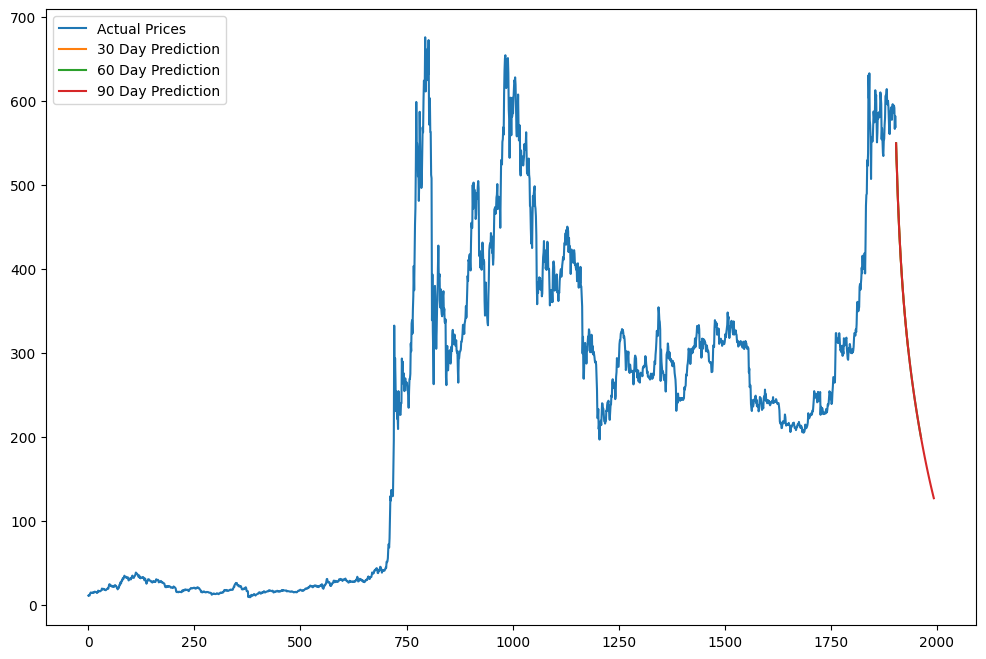

In [ ]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()

#7:2:1

In [ ]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 7:2:1
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.2)
val_size = len(scaled_prices) - train_size - test_size

train, test, val = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size], scaled_prices[train_size+test_size:]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_val, y_val = create_dataset(val, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
1271/1271 - 12s - loss: 0.0020 - val_loss: 9.3759e-04 - 12s/epoch - 10ms/step
Epoch 2/50
1271/1271 - 9s - loss: 8.9247e-04 - val_loss: 7.5889e-04 - 9s/epoch - 7ms/step
Epoch 3/50
1271/1271 - 11s - loss: 7.7863e-04 - val_loss: 7.6651e-04 - 11s/epoch - 8ms/step
Epoch 4/50
1271/1271 - 10s - loss: 6.7841e-04 - val_loss: 9.2476e-04 - 10s/epoch - 8ms/step
Epoch 5/50
1271/1271 - 11s - loss: 6.7080e-04 - val_loss: 0.0020 - 11s/epoch - 9ms/step
Epoch 6/50
1271/1271 - 9s - loss: 7.0042e-04 - val_loss: 7.1635e-04 - 9s/epoch - 7ms/step
Epoch 7/50
1271/1271 - 11s - loss: 7.1603e-04 - val_loss: 6.9747e-04 - 11s/epoch - 8ms/step
Epoch 8/50
1271/1271 - 12s - loss: 7.0589e-04 - val_loss: 8.1345e-04 - 12s/epoch - 10ms/step
Epoch 9/50
1271/1271 - 10s - loss: 7.1081e-04 - val_loss: 0.0012 - 10s/epoch - 8ms/step
Epoch 10/50
1271/1271 - 11s - loss: 6.5550e-04 - val_loss: 7.1354e-04 - 11s/epoch - 9ms/step
Epoch 11/50
1271/1271 - 11s - loss: 6.4494e-04 - val_loss: 9.4418e-04 - 11s/epoch - 8ms/step


In [ ]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

10/10 [==============================] - 0s 5ms/step
MSE: 43.19978600153221
MAE: 4.58557205476036
RMSE: 6.572654410626821
MAPE: 1.669778666762807


1/1 [==============================] - 0s 27ms/step
30-day predictions: [566.18304 565.7763  565.5466  562.5103  562.8777  561.98267 561.09546
 560.0908  559.561   559.0083  558.2056  557.72266 557.28723 556.74945
 556.2102  555.8043  555.37695 554.9472  554.5901  554.27875 553.9488
 553.61914 553.334   553.05676 552.7884  552.54584 552.3285  552.1153
 551.90826 551.71655]
60-day predictions: [566.18304 565.7763  565.5466  562.5103  562.8777  561.98267 561.09546
 560.0908  559.561   559.0083  558.2056  557.72266 557.28723 556.74945
 556.2102  555.8043  555.37695 554.9472  554.5901  554.27875 553.9488
 553.61914 553.334   553.05676 552.7884  552.54584 552.3285  552.1153
 551.90826 551.71655 551.53455 551.3607  551.19934 551.0513  550.91016
 550.7751  550.6479  550.52747 550.4134  550.30646 550.2071  550.11346
 550.0246  549.9405  549.86096 549.7858  549.715   549.64856 549.586
 549.5268  549.4709  549.41815 549.3683  549.3212  549.27686 549.2352
 549.1958  549.1586  549.1236  549.09064]

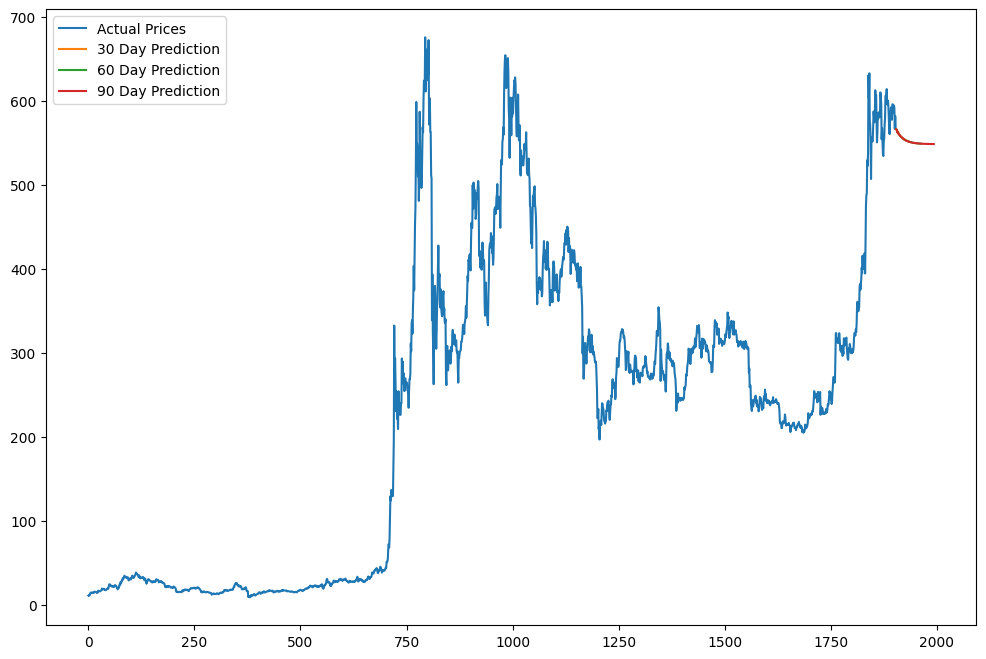

In [ ]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()

#6:2:2

In [ ]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Phân chia dữ liệu theo tỉ lệ 6:2:2
train_size = int(len(scaled_prices) * 0.6)
test_size = int(len(scaled_prices) * 0.2)
val_size = len(scaled_prices) - train_size - test_size

train, test, val = scaled_prices[0:train_size], scaled_prices[train_size:train_size+test_size], scaled_prices[train_size+test_size:]

# Hàm tạo các tập dữ liệu theo định dạng thích hợp cho mô hình RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_val, y_val = create_dataset(val, look_back)

# Định dạng lại dữ liệu đầu vào cho mô hình RNN [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
1081/1081 - 18s - loss: 0.0033 - val_loss: 0.0022 - 18s/epoch - 16ms/step
Epoch 2/50
1081/1081 - 9s - loss: 0.0011 - val_loss: 0.0013 - 9s/epoch - 8ms/step
Epoch 3/50
1081/1081 - 10s - loss: 9.2979e-04 - val_loss: 6.6195e-04 - 10s/epoch - 9ms/step
Epoch 4/50
1081/1081 - 10s - loss: 8.1846e-04 - val_loss: 5.7857e-04 - 10s/epoch - 9ms/step
Epoch 5/50
1081/1081 - 9s - loss: 7.8125e-04 - val_loss: 4.3369e-04 - 9s/epoch - 9ms/step
Epoch 6/50
1081/1081 - 10s - loss: 7.9626e-04 - val_loss: 3.9351e-04 - 10s/epoch - 9ms/step
Epoch 7/50
1081/1081 - 10s - loss: 9.2325e-04 - val_loss: 0.0011 - 10s/epoch - 9ms/step
Epoch 8/50
1081/1081 - 11s - loss: 7.6344e-04 - val_loss: 0.0011 - 11s/epoch - 11ms/step
Epoch 9/50
1081/1081 - 9s - loss: 9.0453e-04 - val_loss: 4.7628e-04 - 9s/epoch - 8ms/step
Epoch 10/50
1081/1081 - 10s - loss: 6.9116e-04 - val_loss: 3.3128e-04 - 10s/epoch - 9ms/step
Epoch 11/50
1081/1081 - 10s - loss: 7.0053e-04 - val_loss: 6.8453e-04 - 10s/epoch - 10ms/step
Epoch 12/50
1

In [ ]:
# Đánh giá mô hình
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

mse = mean_squared_error(y_test_actual[0], test_predict[:,0])
mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual[0] - test_predict[:,0]) / y_test_actual[0])) * 100

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

10/10 [==============================] - 0s 5ms/step
MSE: 81.25804620207522
MAE: 6.373159234385409
RMSE: 9.014324500597658
MAPE: 2.2732189913122087


1/1 [==============================] - 0s 23ms/step
30-day predictions: [555.0149  543.04694 529.7523  515.5973  507.47662 496.24503 486.8624
 478.18466 470.23557 462.2036  455.04944 448.65305 442.70413 437.28345
 432.45224 428.01483 423.80682 419.97076 416.31995 412.8849  409.63974
 406.59964 403.74396 401.06018 398.55832 396.21255 394.01126 391.93915
 389.99197 388.14795]
60-day predictions: [555.0149  543.04694 529.7523  515.5973  507.47662 496.24503 486.8624
 478.18466 470.23557 462.2036  455.04944 448.65305 442.70413 437.28345
 432.45224 428.01483 423.80682 419.97076 416.31995 412.8849  409.63974
 406.59964 403.74396 401.06018 398.55832 396.21255 394.01126 391.93915
 389.99197 388.14795 386.4069  384.7595  383.2003  381.72586 380.33014
 379.01135 377.76254 376.58118 375.46194 374.40146 373.39532 372.4408
 371.53464 370.674   369.85678 369.08032 368.3428  367.64212 366.97644
 366.34375 365.7423  365.17032 364.62625 364.1087  363.61615 363.14746
 362.70132 362.27667 361.87225 361.48

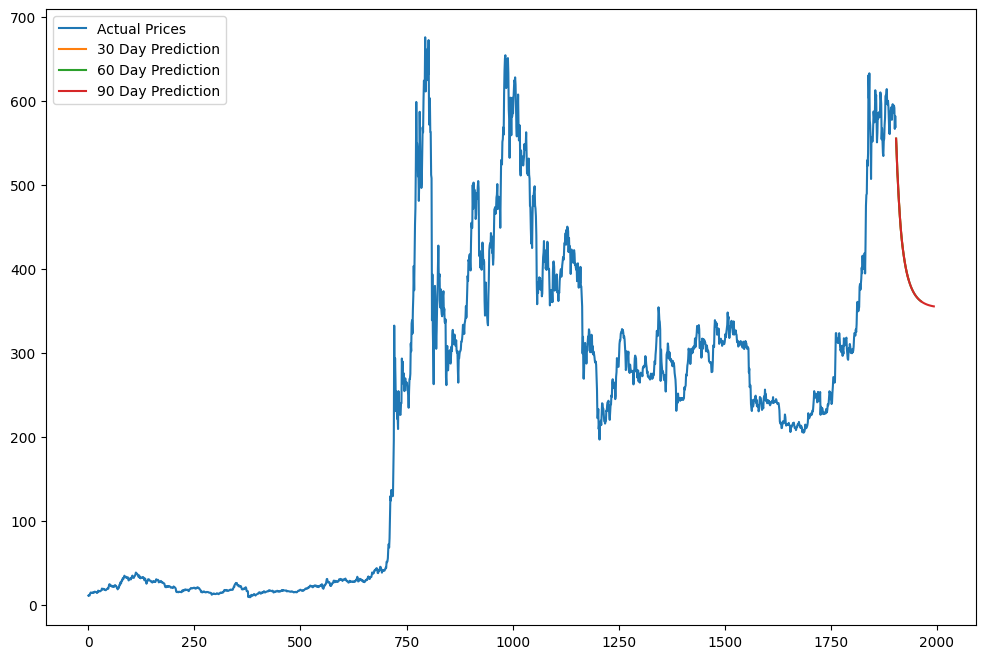

In [ ]:
# Predict future values
def predict_future(model, data, days, look_back):
    predictions = []
    current_step = data[-look_back:]
    for _ in range(days):
        prediction = model.predict(current_step.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        current_step = np.append(current_step[1:], prediction[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Predict 30, 60, and 90 days
pred_30 = predict_future(model, scaled_prices, 30, look_back)
pred_60 = predict_future(model, scaled_prices, 60, look_back)
pred_90 = predict_future(model, scaled_prices, 90, look_back)

# Print daily predictions
print("30-day predictions:", pred_30.flatten())
print("60-day predictions:", pred_60.flatten())
print("90-day predictions:", pred_90.flatten())

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(scaler.inverse_transform(scaled_prices), label='Actual Prices')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 30), pred_30, label='30 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 60), pred_60, label='60 Day Prediction')
plt.plot(np.arange(len(scaled_prices), len(scaled_prices) + 90), pred_90, label='90 Day Prediction')
plt.legend()
plt.show()